<a href="https://www.kaggle.com/code/matthewjansen/application-of-compact-convolutional-transformers?scriptVersionId=139796338" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id=toc></a>
<h1 style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/V6fJnWTt/Ali.png); background-size: 100% auto;background-position: 0px 500px; 
"><span style='color:white'>Application of Compact Convolutional Transformers</span></h1>

<br>

<center>
    <figure>
        <img src="https://production-media.paperswithcode.com/methods/cct_sBBD6Sv.png" alt ="Skin Cancer" style='width:70%;'>
        <figcaption>
            Image Source: <a href="https://paperswithcode.com/method/cct">PapersWithCode | Compact Convolutional Transformers</a>
        </figcaption>
    </figure>
</center>

<br>

## 📄 Overview

In recent years, Transformers have become the go-to for Natural Language Processing (NLP) and have been used in research for Computer Vision and Time Series Forecasting to make groundbreaking discoveries.

There is a clear association between the increasing number of trainable parameters in models and the progress made in these domains, and many researchers may believe this is due to the inability of transformers to adapt to small datasets.

The Compact Convolutional Transformer approach introduced in the paper "Escaping the Big Data Paradigm with Compact Transformers" addresses the issues with Transformer models on small datasets. 

In this notebook, we will cover a comprehensive guide on how to implement and train a CCT model that is specifically designed for classifying skin cancer. The model will accurately identify potential skin cancer cases, which will promote early intervention and improve patient outcomes.

> **Paper:** [Escaping the Big Data Paradigm with Compact Transformers](https://arxiv.org/abs/2104.05704v4)

<br>

## 📁 Dataset

The dataset used in this notebook is know as International Skin Imaging Collaboration (ISIC) Skin Cancer Detection Dataset. The ISIC is an academia and industry partnership designed to facilitate the application of digital skin imaging to help reduce melanoma mortality. This notebook uses the Kaggle version of this dataset.

**For more information check the following:**
> - [Kaggle Dataset](https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign)
> - [The International Skin Imaging Collaboration](https://www.isic-archive.com/#!/topWithHeader/wideContentTop/main)

<br>

## ⚕️ What is Skin Cancer?

Skin cancer is the abnormal growth of skin cells and most often develops on skin exposed to the sun. This common form of cancer can also occur on areas of your skin not ordinarily exposed to sunlight.

Cancer begins when healthy cells change and grow out of control, forming a mass called a tumor. A tumor can be cancerous or benign. Cancerous tumor are malignant, meaning they can grow and spread to other parts of the body. Benign tumors can become quite large, but they will not invade nearby tissue or spread to other parts of your body. Benign tumors have distinct, smooth, regular borders, while malignant tumors have irregular borders and grows faster than benign tumors.

> **Read here for more:** [Skin Cancer (Non-Melanoma) Guide](https://www.cancer.net/cancer-types/skin-cancer-non-melanoma/introduction#:~:text=About%20skin%20cancer&text=A%20cancerous%20tumor%20is%20malignant,most%20common%20type%20of%20cancer.)

<br>

## 🔄 Previous Works

I've covered the classification of skin cancer in depth in this notebook titled: [Transfer Learning | Skin Cancer Classification](https://www.kaggle.com/code/matthewjansen/transfer-learning-skin-cancer-classification/notebook). In the notebook, the usage of basic convolutional neural networks, along with the application of transfer learning techniques are covered and discussed in detail. The utilisation of State-of-the-Art (SOTA) models such as EfficientNet V2 B0 and the Vision Transformer B16 for transfer learning are also included.

This notebook reuses some of the code from the afformentioned notebook. If you are interested in my previous works, feel free to visit the notebook.

<br>

## 📝 Note
I'd like to thank [@jaxford](https://www.kaggle.com/jaxford) for recommending a project based on this paper. To you, the reader: please feel free to **recommend any research papers** you may find interesting as I am keen on reading up on the literature and, maybe (not garenteed), writing a notebook covering their implementation. 

Thank you for your time! 

<br>

<hr>

## Table of contents
- [1 | Inspecting The Dataset](#1)
   > - [Get image paths with glob](#1.1)
   > - [View the number of images present in the dataset](#1.2)
   > - [Create Pandas DataFrames for paths and labels](#1.3)
   > - [Load & View Random Sample Image](#1.4)
   > - [View multiple random samples](#1.5)
   > - [View Train Labels Distribution](#1.6)
  
- [2 | Preprocessing: Building An Input Data Pipeline](#2)
   > - [Create Train & Validation Splits](#2.1)
   > - [View New Train & Validation Labels Distribution](#2.2)
   > - [Create an Image Data Augmentation Layer](#2.3)
   > - [Create Input Data Pipeline w. tf.data API](#2.4)
   
- [3 | The Compact Convolutional Transformers](#3)
   > - [Stochastic Depth](#3.1)
   > - [Multi-Layer Perceptron (MLP)](#3.2notebook)
   > - [Generate CCT Model](#3.3)
   
- [4 | Training The Compact Convolutional Transformer Model](#4)

   
- [5 | Performance Evaluation](#5)
   > - [View Model Histories](#5.1)
   > - [Plot Confusion Matrix](#5.2)
   > - [Plot ROC Curves](#5.3)
   > - [Inpsect Classification Reports](#5.4)
   > - [Record Classification Metrics](#5.5)
   
- [Conclusion](#conclusion)

In [1]:
import random
import os
import glob
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import plot_model
import tensorflow_addons as tfa

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, precision_recall_fscore_support,
    accuracy_score, f1_score, matthews_corrcoef,
    confusion_matrix, ConfusionMatrixDisplay
)
from scikitplot.metrics import plot_roc

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
class CFG:
    POSITIONAL_EMBEDDING = True
    TOKENIZER_CONV_LAYERS = 2
    PROJECTION_DIM = 128
    NUM_HEADS = 2
    
    TRANSFORMER_UNITS = [
        PROJECTION_DIM,
        PROJECTION_DIM,
    ]
    
    TRANSFORMER_LAYERS = 4
    STOCHASTIC_DEPTH_RATE = 0.1
    NUM_CLASSES = 2

    LEARNING_RATE = 0.001
    WEIGHT_DECAY = 0.0001
    EPOCHS = 60
    BATCH_SIZE = 64
    SEED = 42
    TF_SEED = 768
    
    #######################################################
    # Note: If you wish to increase the image size beyond # 
    #       the current value, make sure you have access  # 
    #       to enough memory.                             #
    #######################################################
    HEIGHT = 144
    WIDTH = 144
    CHANNELS = 3
    IMAGE_SIZE = 144
    IMAGE_SHAPE = (144, 144, 3)

<a id='1'></a>
# 1 | Inspecting The Dataset
<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/V6fJnWTt/Ali.png); background-size: 100% auto;"></div>

In [3]:
# Define paths
DATASET_PATH = "/kaggle/input/skin-cancer-malignant-vs-benign/"
TRAIN_PATH = '/kaggle/input/skin-cancer-malignant-vs-benign/train/'
TEST_PATH = '/kaggle/input/skin-cancer-malignant-vs-benign/test/'

In [4]:
# Generate a summary of the dataset
print('DATASET SUMMARY')
print('========================\n')
for dirpath, dirnames, filenames in os.walk(DATASET_PATH):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")
print('\n========================')

DATASET SUMMARY

There are 3 directories and 0 images in /kaggle/input/skin-cancer-malignant-vs-benign/
There are 2 directories and 0 images in /kaggle/input/skin-cancer-malignant-vs-benign/data
There are 2 directories and 0 images in /kaggle/input/skin-cancer-malignant-vs-benign/data/test
There are 0 directories and 360 images in /kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign
There are 0 directories and 300 images in /kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant
There are 2 directories and 0 images in /kaggle/input/skin-cancer-malignant-vs-benign/data/train
There are 0 directories and 1440 images in /kaggle/input/skin-cancer-malignant-vs-benign/data/train/benign
There are 0 directories and 1197 images in /kaggle/input/skin-cancer-malignant-vs-benign/data/train/malignant
There are 2 directories and 0 images in /kaggle/input/skin-cancer-malignant-vs-benign/test
There are 0 directories and 360 images in /kaggle/input/skin-cancer-malignant-vs-benign/tes

<a id='1.1'></a>
### Get image paths with glob

In [5]:
%%time
train_images = glob.glob(f"{TRAIN_PATH}**/*.jpg")
test_images = glob.glob(f"{TEST_PATH}**/*.jpg")

CPU times: user 12.6 ms, sys: 2.09 ms, total: 14.7 ms
Wall time: 16.4 ms


<a id='1.2'></a>
### View the number of images present in the dataset

In [6]:
# Get train & test set sizes
train_size = len(train_images)
test_size = len(test_images)

# Get dataset size
total = train_size + test_size

# View samples counts
print(f'train samples count:\t\t{train_size}')
print(f'test samples count:\t\t{test_size}')
print('=======================================')
print(f'TOTAL:\t\t\t\t{total}')

train samples count:		2637
test samples count:		660
TOTAL:				3297


<a id='1.3'></a>
### Create Pandas DataFrames for paths and labels

In [7]:
def generate_labels(image_paths):
    return [_.split('/')[-2:][0] for _ in image_paths]


def build_df(image_paths, labels):
    # Create dataframe
    df = pd.DataFrame({
        'image_path': image_paths,
        'label': generate_labels(labels)
    })
    
    # Generate label encodings
    df['label_encoded'] = df.apply(lambda row: 0 if row.label == 'malignant' else 1, axis=1)
    
    # Shuffle and return df
    return df.sample(frac=1, random_state=CFG.SEED).reset_index(drop=True)

In [8]:
# Build the DataFrames
train_df = build_df(train_images, generate_labels(train_images))
test_df = build_df(test_images, generate_labels(test_images))

In [9]:
# View first 5 samples in the training set
train_df.head(5)

image_path      label  label_encoded
0  /kaggle/input/skin-cancer-malignant-vs-benign/...  malignant              0
1  /kaggle/input/skin-cancer-malignant-vs-benign/...     benign              1
2  /kaggle/input/skin-cancer-malignant-vs-benign/...     benign              1
3  /kaggle/input/skin-cancer-malignant-vs-benign/...     benign              1
4  /kaggle/input/skin-cancer-malignant-vs-benign/...  malignant              0

<a id='1.4'></a>
### Load & View Random Sample Image

In [10]:
def _load(image_path):
    # Read and decode an image file to a uint8 tensor
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels=3)
    
    # Resize image
    image = tf.image.resize(image, [CFG.HEIGHT, CFG.WIDTH],
                            method=tf.image.ResizeMethod.LANCZOS5)
    
    # Convert image dtype to float32 and NORMALIZE!!!
    image = tf.cast(image, tf.float32)/255.
    
    # Return image
    return image

def view_sample(image, label, color_map='rgb', fig_size=(8, 10)):
    plt.figure(figsize=fig_size)
    
    if color_map=='rgb':
        plt.imshow(image)
    else:
        plt.imshow(tf.image.rgb_to_grayscale(image), cmap=color_map)
    
    plt.title(f'Label: {label}', fontsize=16)
    return

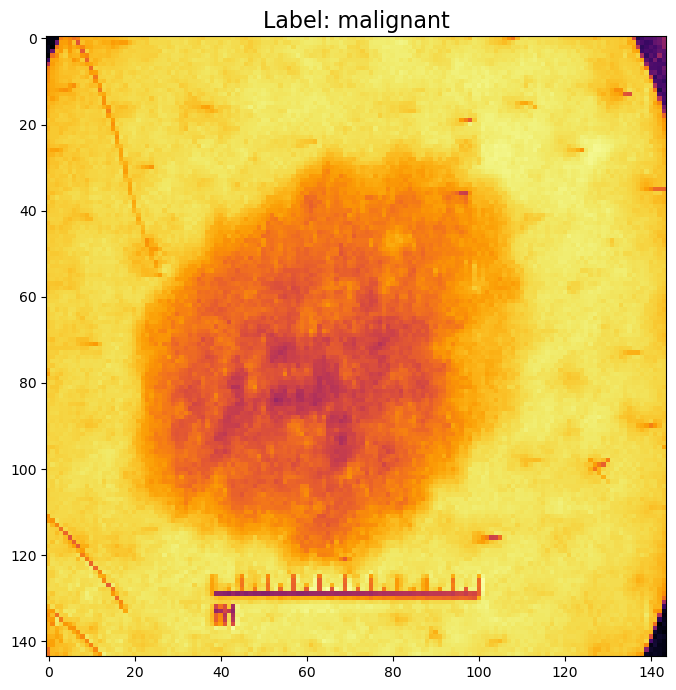

In [11]:
# Select random sample from train_df
idx = random.sample(train_df.index.to_list(), 1)[0]

# Load the random sample and label
sample_image, sample_label = _load(train_df.image_path[idx]), train_df.label[idx]

# View the random sample
view_sample(sample_image, sample_label, color_map='inferno')

<a id='1.5'></a>
### View multiple random samples

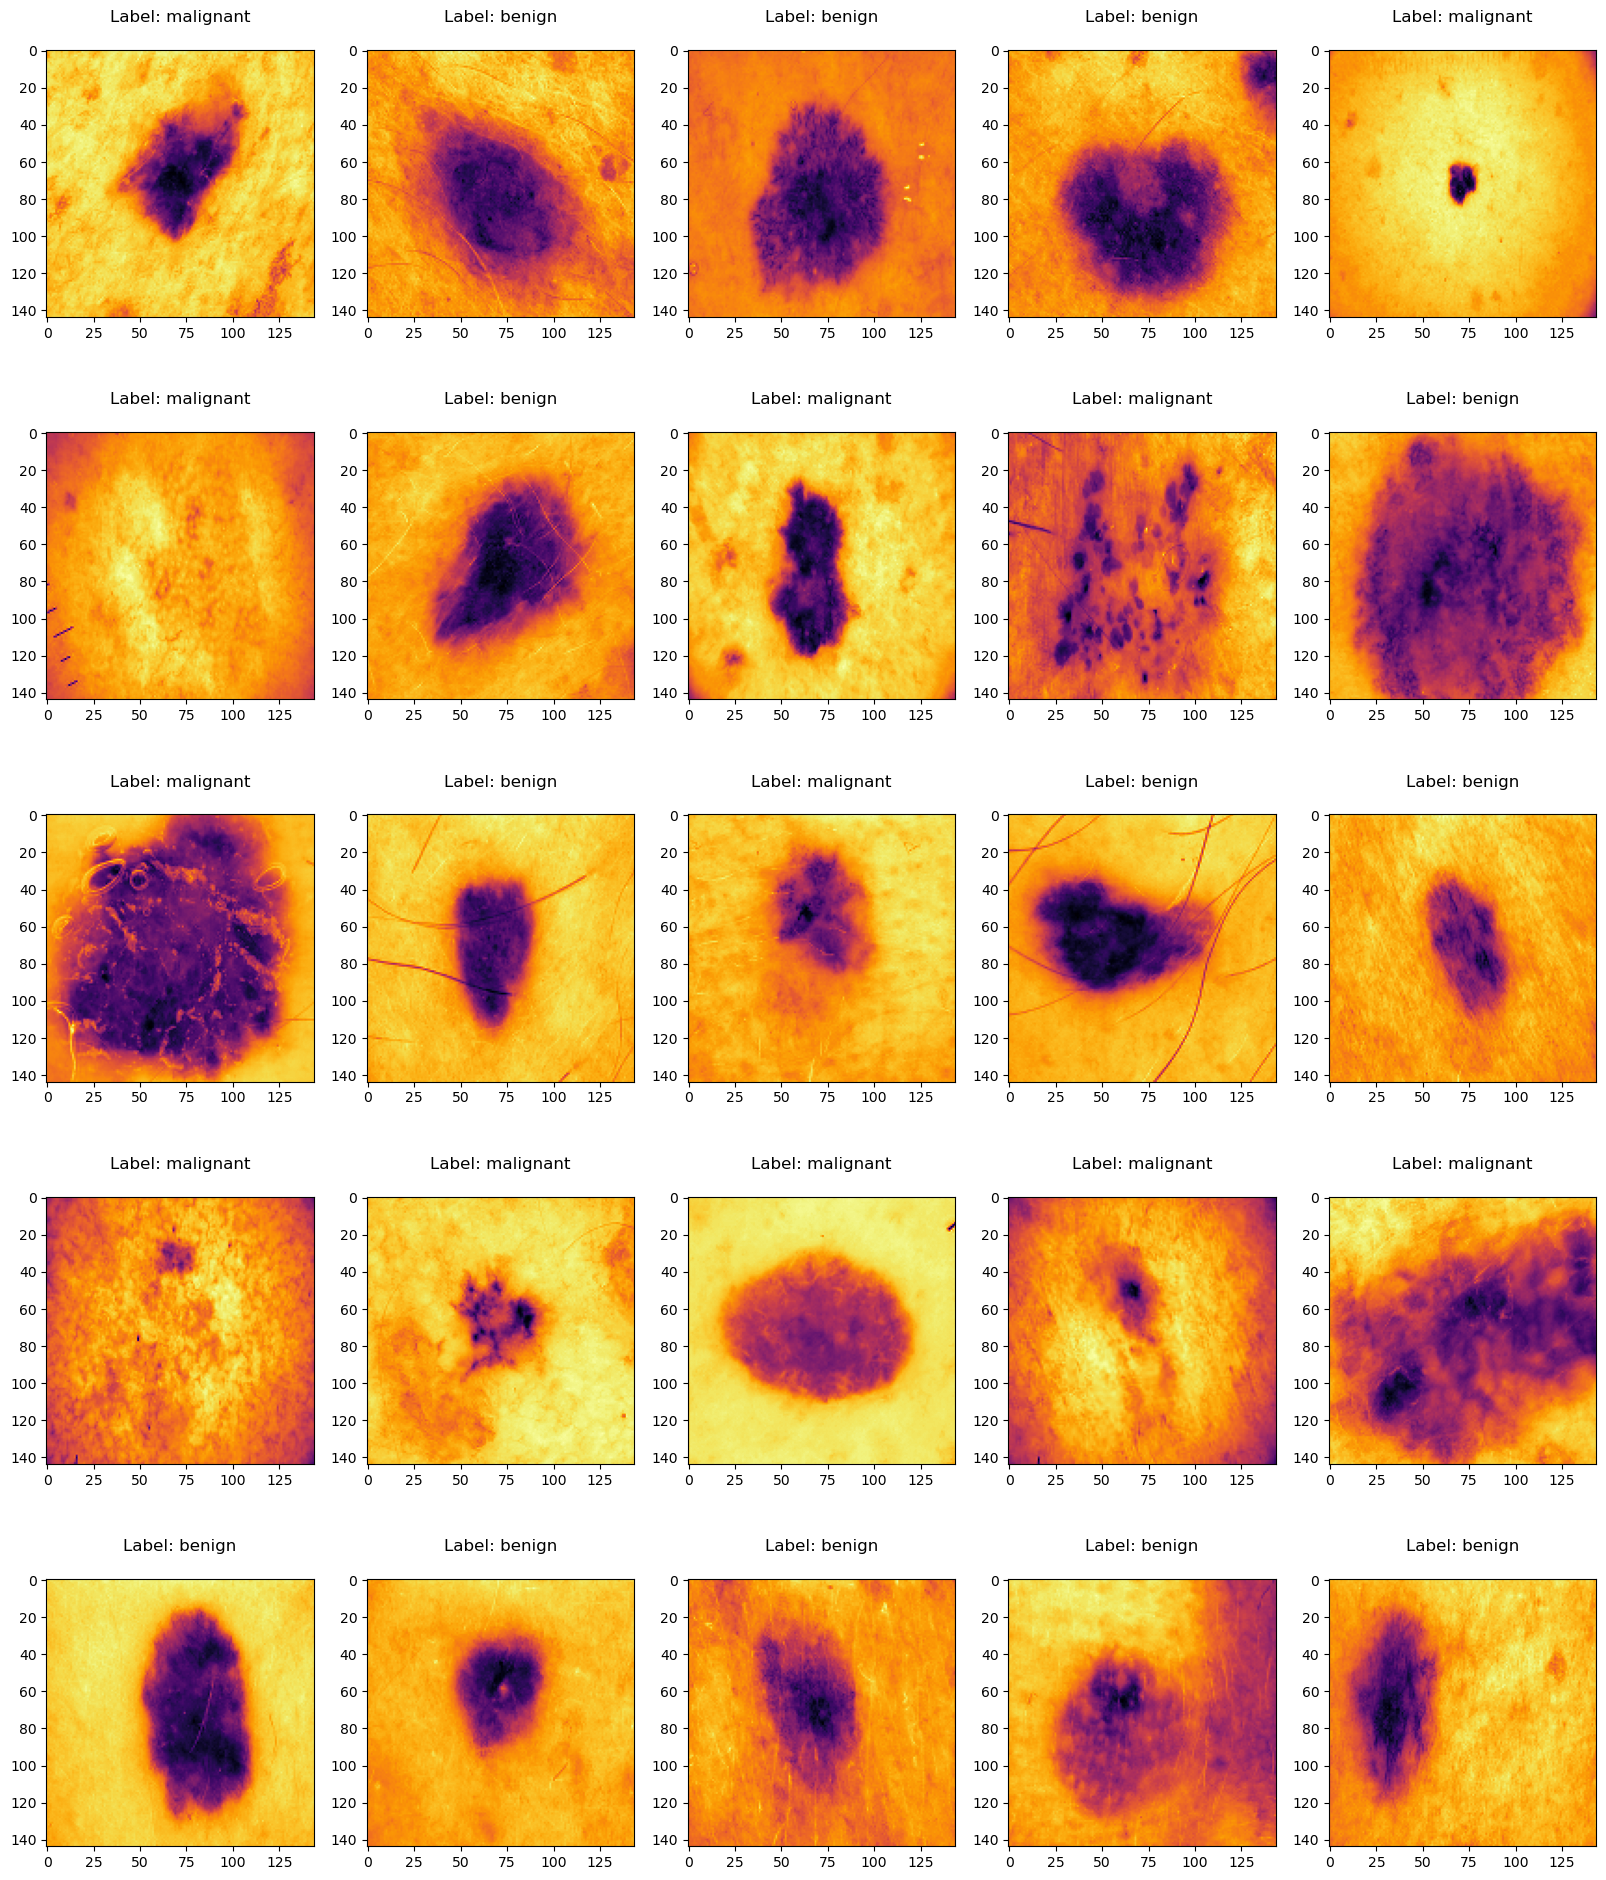

In [12]:
def view_mulitiple_samples(df, sample_loader, count=10, color_map='rgb', fig_size=(14, 10)):
    rows = count//5
    if count%5 > 0:
        rows +=1
    
    idx = random.sample(df.index.to_list(), count)    
    fig = plt.figure(figsize=fig_size)

    for column, _ in enumerate(idx):
        plt.subplot(rows, 5, column+1)
        plt.title(f'Label: {df.label[_]}', pad=20)
        
        if color_map=='rgb':
            plt.imshow(sample_loader(df.image_path[_]))
        else:
            plt.imshow(tf.image.rgb_to_grayscale(sample_loader(df.image_path[_])), cmap=color_map)
    
    return

view_mulitiple_samples(train_df, _load, 
                       count=25, color_map='inferno', 
                       fig_size=(20, 24))

<a id='1.6'></a>
### View Train Labels Distribution

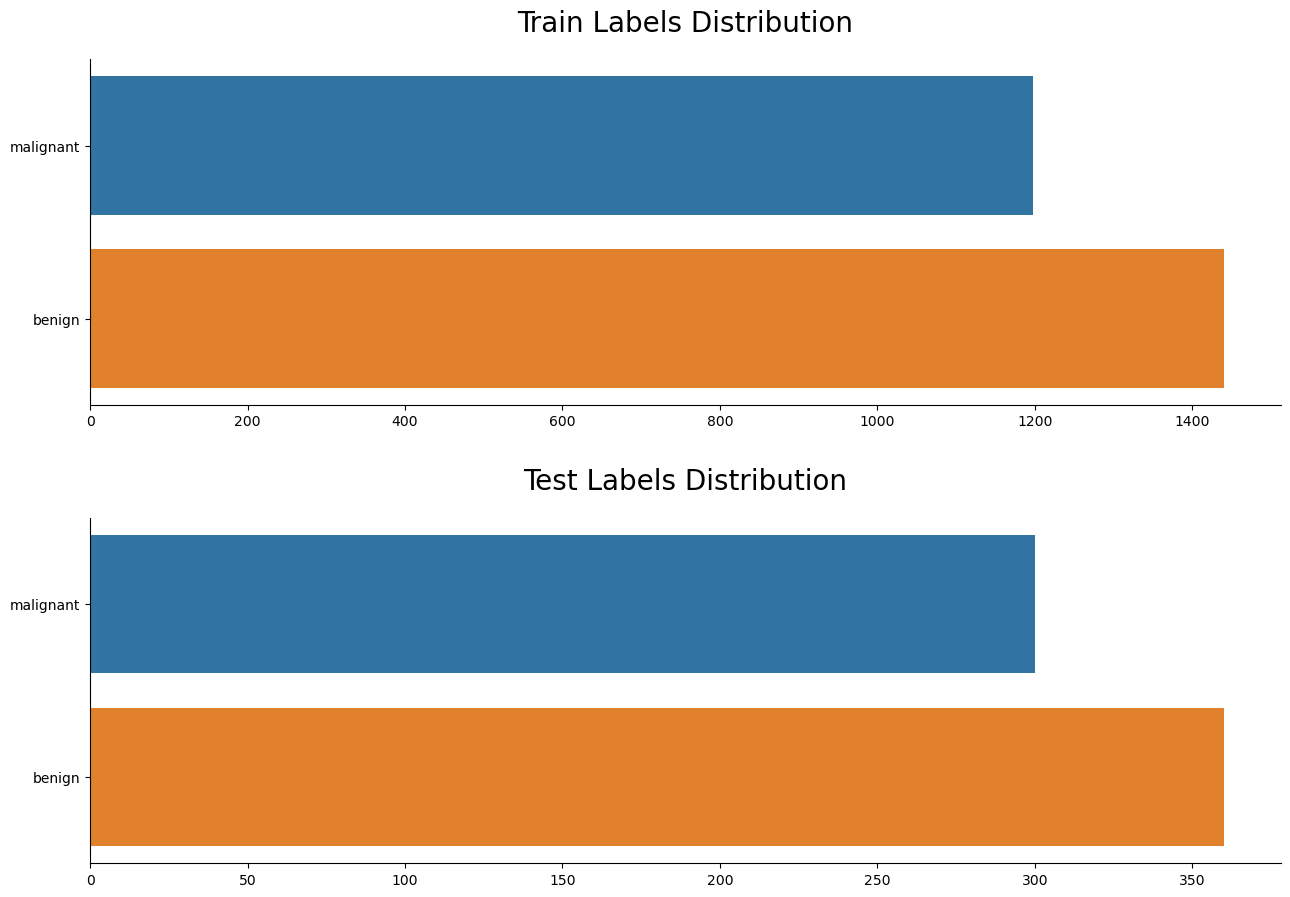

In [13]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 10))

# Set the spacing between subplots
fig.tight_layout(pad=6.0)

# Plot Train Labels Distribution
ax1.set_title('Train Labels Distribution', fontsize=20, pad=20)
train_distribution = train_df['label'].value_counts().sort_values()
sns.barplot(x=train_distribution.values,
            y=list(train_distribution.keys()),
            orient="h",
            ax=ax1)

# Plot Test Labels Distribution
ax2.set_title('Test Labels Distribution', fontsize=20, pad=20)
test_distribution = test_df['label'].value_counts().sort_values()
sns.barplot(x=test_distribution.values,
            y=list(test_distribution.keys()),
            orient="h",
            ax=ax2);

sns.despine();

<div class="alert alert-block alert-info">
    <h3>Observe</h3>
    We see that both the training and test sets are fairly balanced. However, we'll need to create a validation set for hyperparameter tuning.
</div>

<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#B6EADA;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='2'></a>
# 2 | Preprocessing: Building An Input Data Pipeline
<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/V6fJnWTt/Ali.png); background-size: 100% auto;"></div>

<br>

In order to train models with this dataset we'll build an input data pipeline using TensorFlow's tf.data API to handle the loading and passing of the image data to the model. 

To achieve a faster training time we'll insure that the training data is batched and prefetched while the model is training on a previously passed sample. 

> For more information on the tf.data API, follow this link: [Better performance with the tf.data API](https://www.tensorflow.org/guide/data_performance)

Since ImageDataGenerators aren't used in this notebook, an image data augmentation layer will have to be constructed manually. 

> For more information on ImageDataGenerators, follow these links: 
> 
> - [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)
> - [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)

<a id='2.1'></a>
### Create Train & Validation Splits

In [14]:
# Create Train/Val split with Training Set
train_split_idx, val_split_idx, _, _ = train_test_split(train_df.index, 
                                                        train_df.label_encoded, 
                                                        test_size=0.15,
                                                        stratify=train_df.label_encoded,
                                                        random_state=CFG.SEED)

In [15]:
# Get new training and validation data
train_new_df = train_df.iloc[train_split_idx].reset_index(drop=True)
val_df = train_df.iloc[val_split_idx].reset_index(drop=True)

# View shapes
train_new_df.shape, val_df.shape

((2241, 3), (396, 3))

<a id='2.2'></a>
### View New Train & Validation Labels Distribution

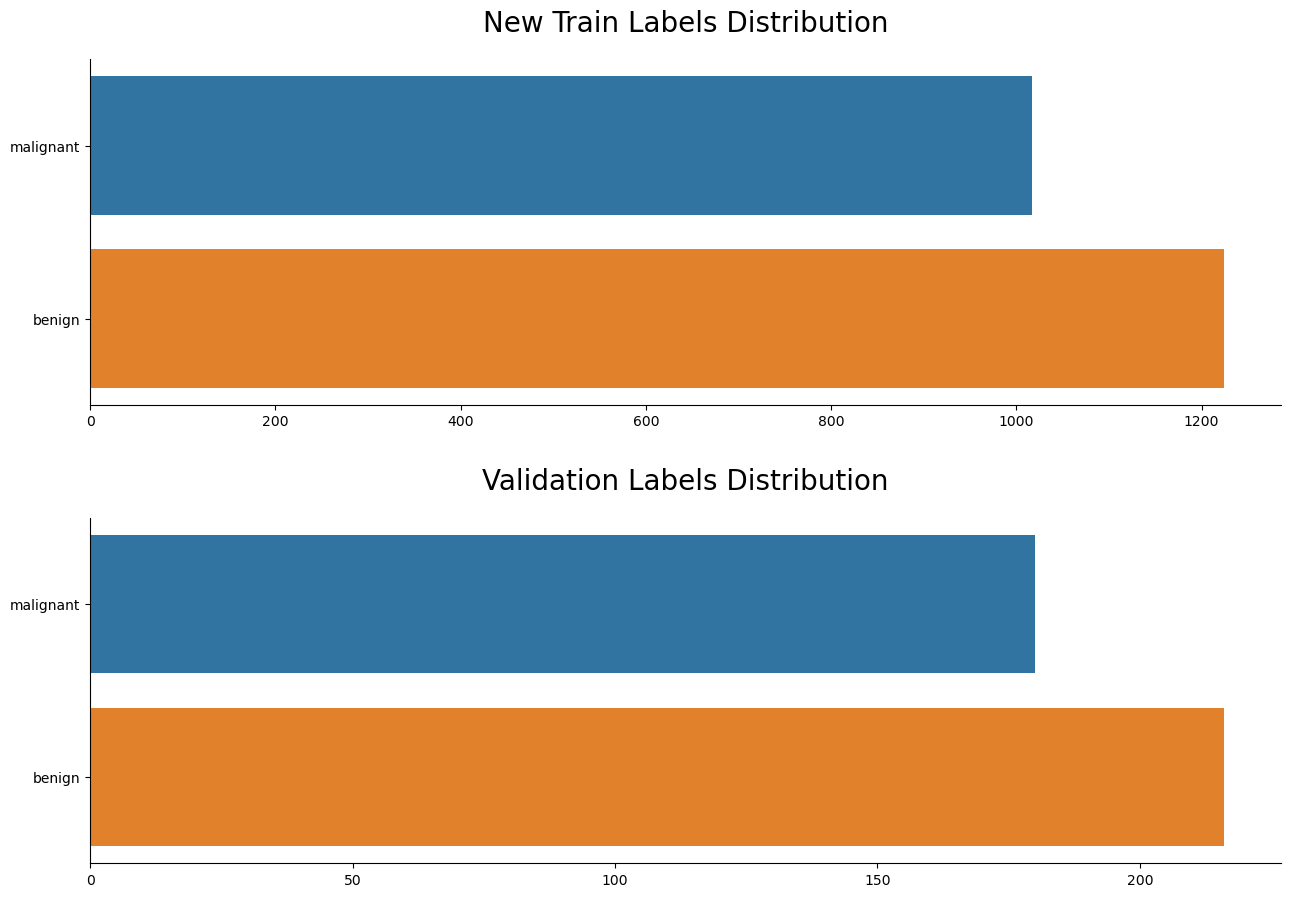

In [16]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 10))

# Set the spacing between subplots
fig.tight_layout(pad=6.0)

# Plot New Train Labels Distribution
ax1.set_title('New Train Labels Distribution', fontsize=20, pad=20)
train_new_distribution = train_new_df['label'].value_counts().sort_values()
sns.barplot(x=train_new_distribution.values,
            y=list(train_new_distribution.keys()),
            orient="h",
            ax=ax1)

# Plot Validation Labels Distribution
ax2.set_title('Validation Labels Distribution', fontsize=20, pad=20)
val_distribution = val_df['label'].value_counts().sort_values()
sns.barplot(x=val_distribution.values,
            y=list(val_distribution.keys()),
            orient="h",
            ax=ax2);

sns.despine();

<a id='2.3'></a>
### Create an Image Data Augmentation Layer

In [17]:
# Build augmentation layer
augmentation_layer = Sequential([
    layers.RandomFlip(mode='horizontal_and_vertical', seed=CFG.TF_SEED),
    layers.RandomZoom(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1), seed=CFG.TF_SEED),
], name='augmentation_layer')

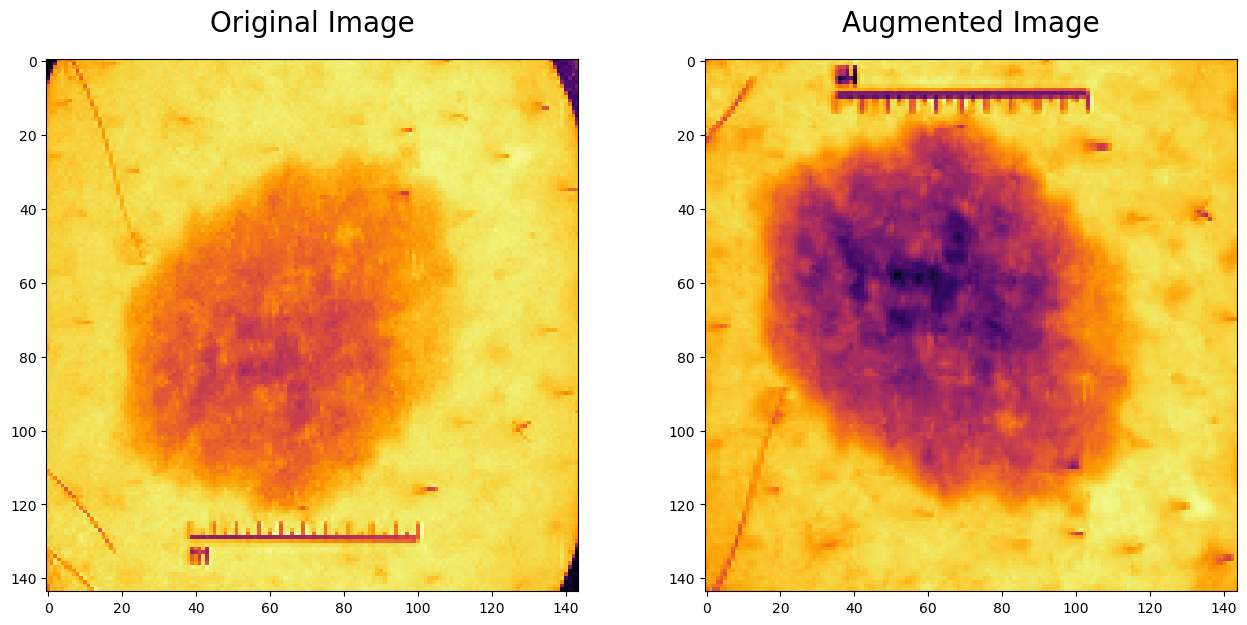

In [18]:
image = tf.image.rgb_to_grayscale(sample_image)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 10))

# Set the spacing between subplots
fig.tight_layout(pad=6.0)

# View Original Image
ax1.set_title('Original Image', fontsize=20, pad=20)
ax1.imshow(image, cmap='inferno');

# View Augmented Image
ax2.set_title('Augmented Image', fontsize=20, pad=20)
ax2.imshow(augmentation_layer(image), cmap='inferno');

<div class="alert alert-block alert-info">
    <h3>Observe</h3>
    The augmentation layer generates augmentations that are slightly different to the original images. This is intended as we aim to generate augmented images which are similar to that of the original dataset images while preserving the images key features. 
</div>

<a id='2.4'></a>
### Create Input Data Pipeline w. tf.data API

In [19]:
def encode_labels(labels, encode_depth=2):
    return tf.one_hot(labels, depth=encode_depth).numpy()

def create_pipeline(df, load_function, augment=False, batch_size=32, shuffle=False, cache=None, prefetch=False):
    '''
    Generates an input pipeline using the tf.data API given a Pandas DataFrame and image loading function.
    
    @params
        - df: (pd.DataFrame) -> DataFrame containing paths and labels 
        - load_function: (function) -> function used to load images given their paths
        - augment: (bool) -> condition for applying augmentation
        - batch_size: (int) -> size for batched (default=32) 
        - shuffle: (bool) -> condition for data shuffling, data is shuffled when True (default=False)
        - cache: (str) -> cache path for caching data, data is not cached when None (default=None)
        - prefetch: (bool) -> condition for prefeching data, data is prefetched when True (default=False)
        
    @returns
        - dataset: (tf.data.Dataset) -> dataset input pipeline used to train a TensorFlow model
    '''
    # Get image paths and labels from DataFrame
    image_paths = df.image_path
    image_labels = encode_labels(df.label_encoded)
    AUTOTUNE = tf.data.AUTOTUNE
    
    # Create dataset with raw data from DataFrame
    ds = tf.data.Dataset.from_tensor_slices((image_paths, image_labels))
    
    # Map augmentation layer and load function to dataset inputs if augment is True
    # Else map only the load function
    if augment:
        ds = ds.map(lambda x, y: (augmentation_layer(load_function(x)), y), num_parallel_calls=AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (load_function(x), y), num_parallel_calls=AUTOTUNE)
    
    # Apply shuffling based on condition
    if shuffle:
        ds = ds.shuffle(buffer_size=1000)
        
    # Apply batching
    ds = ds.batch(batch_size)
    
    # Apply caching based on condition
    # Note: Use cache in memory (cache='') if the data is small enough to fit in memory!!!
    if cache != None:
        ds = ds.cache(cache)
    
    # Apply prefetching based on condition
    # Note: This will result in memory trade-offs
    if prefetch:
        ds = ds.prefetch(buffer_size=AUTOTUNE)
    
    # Return the dataset
    return ds

In [20]:
# Generate Train Input Pipeline
train_ds = create_pipeline(train_new_df, _load, augment=True, 
                           batch_size=CFG.BATCH_SIZE, 
                           shuffle=False, prefetch=True)

# Generate Validation Input Pipeline
val_ds = create_pipeline(val_df, _load, 
                         batch_size=CFG.BATCH_SIZE, 
                         shuffle=False, prefetch=False)

# Generate Test Input Pipeline
test_ds = create_pipeline(test_df, _load, 
                          batch_size=CFG.BATCH_SIZE, 
                          shuffle=False, prefetch=False)

In [21]:
# View string representation of datasets
print('========================================')
print('Train Input Data Pipeline:\n\n', train_ds)
print('========================================')
print('Validation Input Data Pipeline:\n\n', val_ds)
print('========================================')
print('Test Input Data Pipeline:\n\n', test_ds)
print('========================================')

Train Input Data Pipeline:

 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 144, 144, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>
Validation Input Data Pipeline:

 <_BatchDataset element_spec=(TensorSpec(shape=(None, 144, 144, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>
Test Input Data Pipeline:

 <_BatchDataset element_spec=(TensorSpec(shape=(None, 144, 144, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>


<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#B6EADA;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id=3></a>
# 3 | The Compact Convolutional Transformers
<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/V6fJnWTt/Ali.png); background-size: 100% auto;"></div>

<br>

Compact Convolutional Transformers (CCTs) represent a novel hybrid architectural approach which involves merging the benefits of Convolutional Neural Networks and Transformers. This novel architecture efficiently captures local patterns and global dependencies within small datasets.

<br>

<center>
    <figure>
        <img src="https://i.postimg.cc/wj0FdNkN/CCT.png" alt ="CCT (Diagram)" style='width:100%;'>
        <figcaption>
            Image Source: <a href="https://paperswithcode.com/method/cct">PapersWithCode | Compact Convolutional Transformers</a>
        </figcaption>
    </figure>
</center>

<br>

At its core, CCT integrates convolutional layers in the tokenization step, which excel at extracting spatial hierarchies and local features, with self-attention mechanisms intrinsic to Transformers, which enable modelling global relationships in data. The result is a highly versatile architecture capable of simultaneously handling fine-grained details and holistic context in various tasks, such as image classification, object detection, and sequential data analysis.

In [22]:
from IPython.display import HTML

HTML('<div align="center"><iframe width="700" height="400" src="https://www.youtube.com/embed/AEWhf_hMBgs" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe></div>')

The CCT architecture aims to increase performance and provide flexibility for input image sizes whilst demonstrating the independence of Positional Embedding in contrast to other transformer-based architectures. The utilization of the CCT architecture empowers researchers to achieve noteworthy results despite having restricted trainable parameters, small datasets, and a single processing unit, be it a GPU or a CPU.

In this section, we will cover the implementation and training of the Compact Convolutional Transformer to classify skin cancer with our pre-contructed input datapipeline.


**For more information on the Compact Convolutional Transformer architectures and Transformers in general, please refer to the following links:**
> - CCT Paper: [Escaping the Big Data Paradigm with Compact Transformers](https://arxiv.org/abs/2104.05704v4)
> - Vision Transformer Paper: [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale (2021)](https://arxiv.org/pdf/2010.11929.pdf)
> - Attention Mechanism Paper: [Attention Is All You Need (2017)](https://arxiv.org/pdf/1706.03762.pdf)
> - V7Labs Article: [Vision Transformer: What It Is & How It Works [2023 Guide]](https://www.v7labs.com/blog/vision-transformer-guide)
> - Viso.ai Article: [Vision Transformers (ViT) in Image Recognition – 2022 Guide](https://viso.ai/deep-learning/vision-transformer-vit/)

In [23]:
class CCTTokenizer(layers.Layer):
    def __init__(
        self,
        kernel_size=3,
        stride=1,
        padding=1,
        pooling_kernel_size=3,
        pooling_stride=2,
        num_conv_layers=2,
        num_output_channels=[64, 128],
        positional_embedding=True,
        **kwargs,
    ):
        # Initialize tokenizer
        super(CCTTokenizer, self).__init__(**kwargs)
        self.tokenizer = Sequential()
        
        for _ in range(num_conv_layers):
            # Add Conv Layer
            self.tokenizer.add(
                layers.Conv2D(
                    num_output_channels[_],
                    kernel_size, stride,
                    padding="valid", use_bias=False, 
                    activation="relu",kernel_initializer="he_normal",
                    name=f'tokenizer_conv_{_}'
                )
            )
            # Add Padding Layer
            self.tokenizer.add(
                layers.ZeroPadding2D(padding, name=f'tokenizer_padding_{_}')
            )
            
            # Add MaxPool layer
            self.tokenizer.add(
                layers.MaxPool2D(
                    pooling_kernel_size, 
                    pooling_stride, "same", 
                    name=f'tokenizer_maxpool_2d_{_}'
                )
            )

        self.positional_embedding = positional_embedding

    def __call__(self, images):
        # Tokenize image
        tokenized_image = self.tokenizer(images)
        
        # Flatten spatial dimensions to form sequences
        img_seq = tf.reshape(
            tokenized_image,
            (-1, tf.shape(tokenized_image)[1] * tf.shape(tokenized_image)[2], tf.shape(tokenized_image)[-1]),
        )
        
        return img_seq

    def gen_positional_embedding(self, image_size):
        # Optional: Positional embedding
        if self.positional_embedding:
            # Compute number of sequences to initialise an embedding layer
            # used to compute the positional embeddings.
            dummy_inputs = tf.ones((1, image_size, image_size, 3)) # dummy input
            
            # Pass input to tokenizer
            dummy_outputs = self.__call__(dummy_inputs)
            
            # Get seq length and projection dimension from dummy output
            sequence_length = dummy_outputs.shape[1]
            projection_dim = dummy_outputs.shape[-1]

            # Generate an embedding layer
            embedding_layer = layers.Embedding(
                input_dim=sequence_length, output_dim=projection_dim, name='tokenizer_pos_embedding'
            )
            
            return embedding_layer, sequence_length
        else:
            return None # Positional Embedding Disabled

<a id=3.1></a>
## Stochastic Depth

Stochastic Depth is a regularization technique which is used to enhance the training of deep neural network architectures, especially within architectures which utillize skip connections. The key concept behind Stochastic Depth is tho randomly drop (or skip) entire residual blocks or layers during training, hence, effectively incorperating a form of controlled network pruning during each feedforward pass.

This regularization technique aims to prevent overfitting, encourage feature reusability, and improve the capability of model generalization. The usage of Stochastic Depth for the training of deep neural network models leads to substancially reduced training times, as well as increased generalization on test sample.

To train our CCT model, we'll make use of Stochatic Depth in persuit of increased performance.

<br>

**For more information on Stochastic Depth, kindly refer to the following links:**
> - [Paper: Deep Networks with Stochastic Depth](https://arxiv.org/abs/1603.09382)
> - [Medium.com | Review: Stochastic Depth (Image Classification)](https://towardsdatascience.com/review-stochastic-depth-image-classification-a4e225807f4a)
> - [TensorFlow Addons (TFA) | Stochastic Depth](https://www.tensorflow.org/addons/api_docs/python/tfa/layers/StochasticDepth) 

In [24]:
class StochasticDepth(layers.Layer):
    def __init__(self, droupout_rate, **kwargs):
        super().__init__(**kwargs)
        self.droupout_rate = droupout_rate

    def __call__(self, x, training=None):
        if training:
            # Set survival rate
            survival_rate = 1 - self.droupout_rate
            
            # Define output shape
            shape = (x.shape[0],) + (1,) * (x.shape[0] - 1)
            
            # Generate random dropouts
            random_tensor = survival_rate + tf.random.uniform(shape, 0, 1)
            random_tensor = tf.floor(random_tensor)
            
            return (x / survival_rate) * random_tensor
        
        # Return input if not training 
        return x

<a id=3.2></a>
## Multi-Layer Perceptron (MLP)

> For more information on Multi-Layer Perceptron (MLP), kindly refer to the following links:
> - [Multilayer perceptrons](http://users.ics.aalto.fi/ahonkela/dippa/node41.html)
> - [Activation Function| Gaussian Error Linear Units (GELUs)](https://arxiv.org/abs/1606.08415v5)
> - [Dive Into Deep Learning | Multilayer Perceptrons](https://d2l.ai/chapter_multilayer-perceptrons/mlp.html) 

In [25]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

<a id=3.3></a>
## Generate CCT Model

In [26]:
def create_cct_model(
    image_size=CFG.IMAGE_SIZE,
    input_shape=CFG.IMAGE_SHAPE,
    num_heads=CFG.NUM_HEADS,
    projection_dim=CFG.PROJECTION_DIM,
    transformer_units=CFG.TRANSFORMER_UNITS,
    transformer_layers=CFG.TRANSFORMER_LAYERS,
    possitional_embedding=CFG.POSITIONAL_EMBEDDING,
    stochastic_depth_rate = CFG.STOCHASTIC_DEPTH_RATE
):
    # Define Input Layer
    inputs = layers.Input(input_shape, dtype=tf.float32, name='input_image')

    # Augment input image
    augmented = augmentation_layer(inputs)

    # Tokenize image patches
    cct_tokenizer = CCTTokenizer()
    encoded_patches = cct_tokenizer(augmented)

    # Apply positional embedding to tokens
    if possitional_embedding:
        pos_embedding_layer, seq_length = cct_tokenizer.gen_positional_embedding(image_size)
        positions = tf.range(start=0, limit=seq_length, delta=1)
        
        pos_embeddings = pos_embedding_layer(positions)        
        encoded_patches += pos_embeddings

    # Compute Stochastic Depth probabilities
    dpr = [_ for _ in np.linspace(0, stochastic_depth_rate, transformer_layers)]

    # Generate layers for the Transformer block
    for _ in range(transformer_layers):
        # Layer normalization
        norm_layer_1 = layers.LayerNormalization(epsilon=1e-5)(encoded_patches)

        # Generate Multi-Head Self-Attention layer
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(norm_layer_1, norm_layer_1)

        # Skip connection 1
        attention_output = StochasticDepth(dpr[_])(attention_output)
        residual_1 = layers.Add()([
            attention_output, encoded_patches
        ])

        # Layer normalization
        norm_layer_2 = layers.LayerNormalization(epsilon=1e-5)(residual_1)

        # MLP Layer
        mlp_layer = mlp(
            norm_layer_2, hidden_units=transformer_units, dropout_rate=0.1
        )

        # Skip connection 2
        stochastic_depth_1 = StochasticDepth(dpr[_])(mlp_layer)
        encoded_patches = layers.Add()([stochastic_depth_1, residual_1])

    # Apply sequence pooling
    seq_representation = layers.LayerNormalization(epsilon=1e-5)(encoded_patches)
    
    attention_weights = tf.nn.softmax(layers.Dense(1)(seq_representation), axis=1)
    
    weighted_seq_representation = tf.matmul(
        attention_weights, 
        seq_representation, 
        transpose_a=True
    )
    weighted_seq_representation = tf.squeeze(weighted_seq_representation, -2)

    # Feed forward to output layer
    output_layer = layers.Dense(
        CFG.NUM_CLASSES, 
        activation=tf.nn.sigmoid,
        name='output_layer'
    )(weighted_seq_representation)
    
    # Generate Model
    model = tf.keras.Model(
        inputs=[inputs], outputs=[output_layer], 
        name='compact_convolutional_transformer_model'
    )
    
    return model

In [27]:
# Construct Model
cct_model = create_cct_model()

# View model summary
cct_model.summary()

Model: "compact_convolutional_transformer_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 144, 144, 3  0           []                               
                                )]                                                                
                                                                                                  
 augmentation_layer (Sequential  (144, 144, None)    0           ['input_image[0][0]']            
 )                                                                                                
                                                                                                  
 sequential (Sequential)        (None, 36, 36, 128)  75456       ['augmentation_layer[0][0]']     
                                                            

<div class="alert alert-block alert-info">
    <h3>Observe</h3>
    We see that our <b>CCT Model consists of ~0.73M total parameters</b>. This is <b>astronomically less</b> than that of the <b>Vision Transformer (~86.0M parameters)</b> and <b>EfficientNet V2 (~6.0M parameters)</b> model variants.
</div>

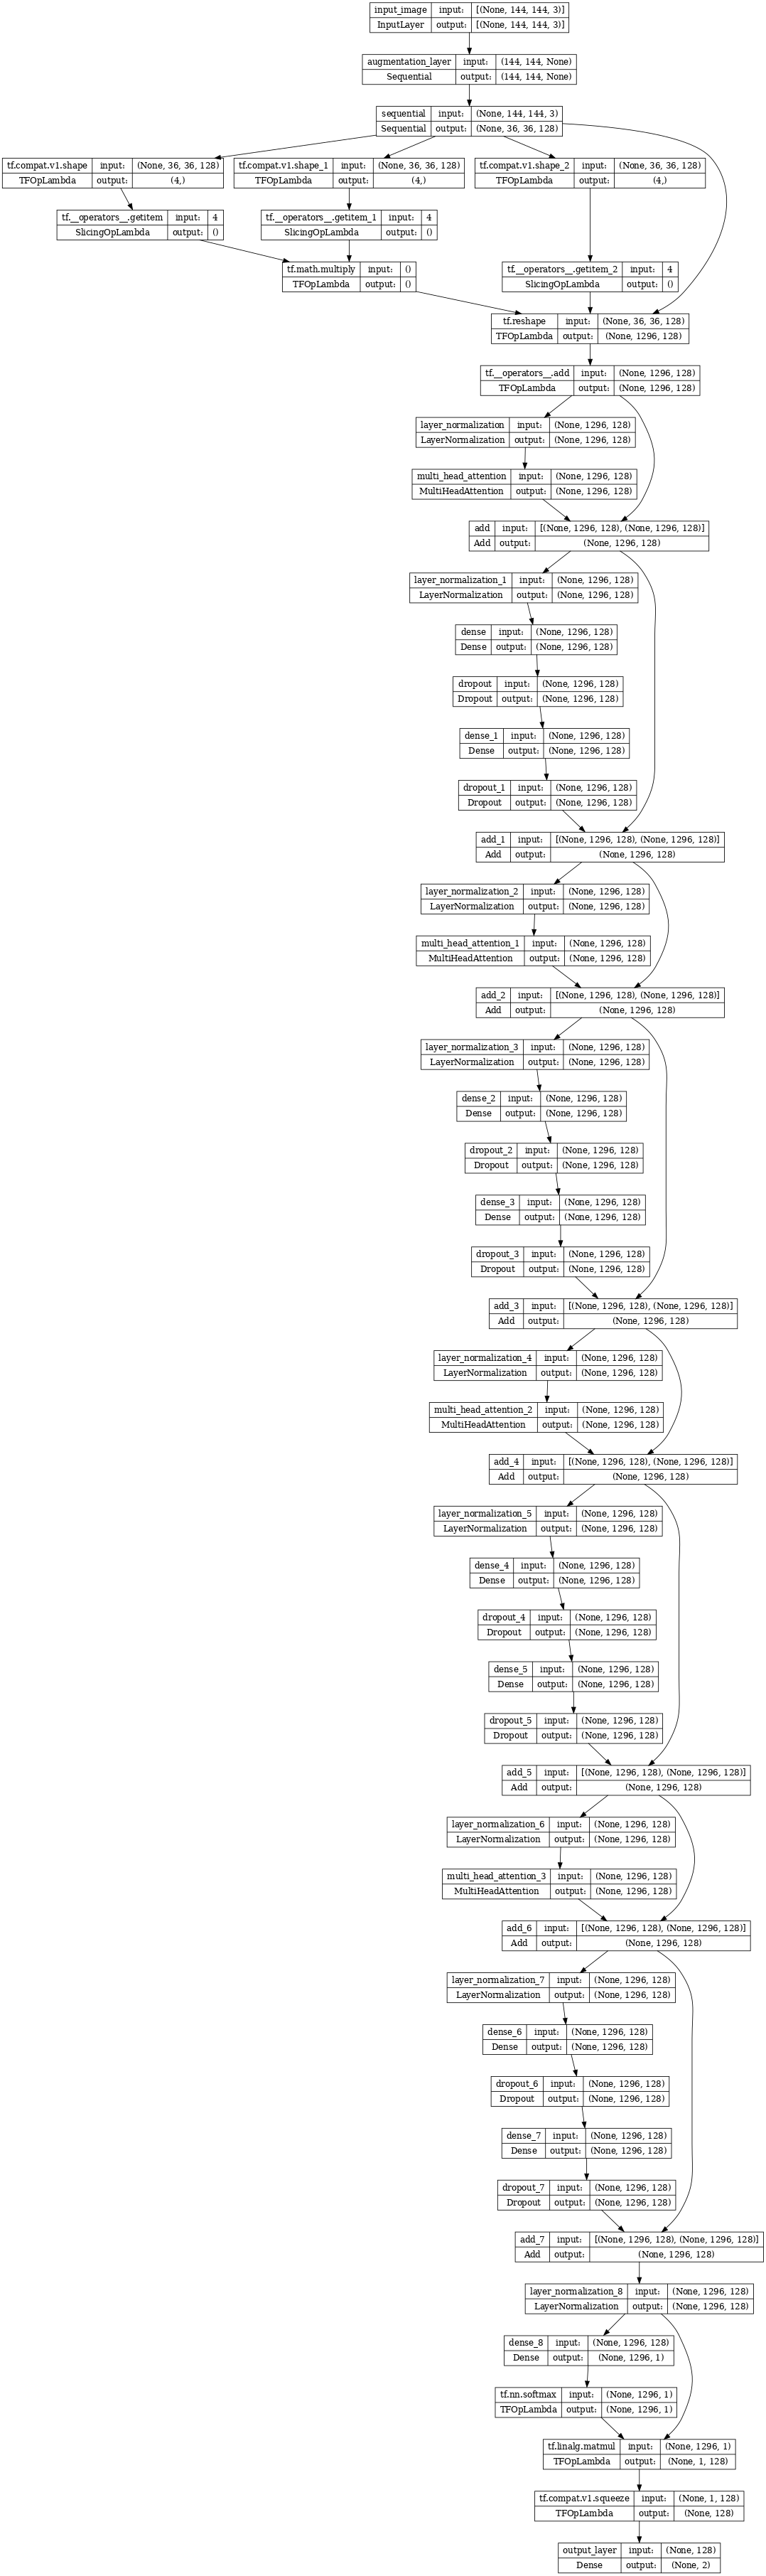

In [28]:
# Explore model visually
plot_model(
    cct_model, dpi=60,
    show_shapes=True
)

<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#B6EADA;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id=4></a>
# 4 | Training the Compact Convolutional Transformers
<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/V6fJnWTt/Ali.png); background-size: 100% auto;"></div>

<br><br>

<center>
    <figure>
        <img src="https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExMzYzMzU3OWE2NmQwOTg3MzZmNGJjNWZiZjRjOTAwMDVmMGMxNGVlZiZlcD12MV9pbnRlcm5hbF9naWZzX2dpZklkJmN0PWc/PjJ1cLHqLEveXysGDB/giphy.gif" alt ="UCF101" style='width: 60%;'>
        <figcaption>
            Source: Giphy | <a href="https://giphy.com/gifs/digital-brain-ai-PjJ1cLHqLEveXysGDB">Glow Machine Learning</a> by <a href="https://giphy.com/xponentialdesign">xponentialdesign</a>
        </figcaption>
    </figure>
</center>

<br>

To train the CCT model we'll use Binary Crossentropy as the loss function since this is a classification problem for binary labels. As for the optimizer, we'll use the Adam optimizer with 0.001 as the (default) learning rate. 

To prevent the occurance of overfitting during training we'll have to make use of TensorFlow's Callback API to implement the EarlyStopping & (optional) ReduceLROnPlateau callbacks. The only metrics we'll track during the training of the model will be the loss and accuracy metrics.

**See the following for more information:**
>- **Binary Crossentropy Loss Function:**
>    - [Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names](https://gombru.github.io/2018/05/23/cross_entropy_loss/)
>    - [TensorFlow Binary Crossentropy Loss Implementation](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
>- **AdamW Optimizer:**
>    - [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980)
>    - [AdamW: Decoupled Weight Decay Regularization](https://arxiv.org/abs/1711.05101v3)
>    - [TensorFlow Adam Implementation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)
>    - [TensorFlow Addons AdamW Implementation](https://www.tensorflow.org/addons/api_docs/python/tfa/optimizers/AdamW)
>- **TensorFlow Callback API:**
>    - [EarlyStopping Implementation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
>    - [ReduceLROnPlateau Implementation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau)
>- **TensorFlow Metrics:**
>    - [TensorFlow Metrics Overview](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [29]:
# Define Early Stopping Callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=20, 
    restore_best_weights=True)

# (Optional) Define Reduce Learning Rate Callback
# reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_loss',
#     patience=6,
#     factor=0.1,
#     verbose=1)

# Define Callbacks and Metrics lists
CALLBACKS = [
    early_stopping_callback, 
#     reduce_lr_callback
]

METRICS = ['accuracy']

In [30]:
tf.random.set_seed(CFG.SEED)

# Compile the model
cct_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1),
    optimizer=tfa.optimizers.AdamW(learning_rate=CFG.LEARNING_RATE, weight_decay=CFG.WEIGHT_DECAY),
    metrics=METRICS
)

# Train the model 
print(f'Training {cct_model.name}.')
print(f'Train on {len(train_new_df)} samples, validate on {len(val_df)} samples.')
print('----------------------------------')

cct_model_history = cct_model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=CFG.BATCH_SIZE,
    epochs=CFG.EPOCHS,
    callbacks=CALLBACKS,
)

Training compact_convolutional_transformer_model.
Train on 2241 samples, validate on 396 samples.
----------------------------------
Epoch 1/60
36/36 [==============================] - 44s 996ms/step - loss: 0.7932 - accuracy: 0.5484 - val_loss: 0.6956 - val_accuracy: 0.5455
Epoch 2/60
36/36 [==============================] - 33s 909ms/step - loss: 0.6714 - accuracy: 0.5944 - val_loss: 0.6442 - val_accuracy: 0.5682
Epoch 3/60
36/36 [==============================] - 32s 878ms/step - loss: 0.5579 - accuracy: 0.7323 - val_loss: 0.5219 - val_accuracy: 0.7929
Epoch 4/60
36/36 [==============================] - 32s 877ms/step - loss: 0.5060 - accuracy: 0.7796 - val_loss: 0.4950 - val_accuracy: 0.7955
Epoch 5/60
36/36 [==============================] - 33s 910ms/step - loss: 0.4851 - accuracy: 0.7979 - val_loss: 0.4737 - val_accuracy: 0.8005
Epoch 6/60
36/36 [==============================] - 32s 878ms/step - loss: 0.4736 - accuracy: 0.8086 - val_loss: 0.4584 - val_accuracy: 0.7980
Epoch 7/6

In [31]:
# Evaluate the model
cct_evaluation = cct_model.evaluate(test_ds)

11/11 [==============================] - 3s 278ms/step - loss: 0.4060 - accuracy: 0.8500


In [32]:
# Generate model probabilities and associated predictions
cct_test_probabilities = cct_model.predict(test_ds, verbose=1)
cct_test_predictions = tf.argmax(cct_test_probabilities, axis=1)

11/11 [==============================] - 3s 189ms/step


<div class="alert alert-block alert-info">
    <h3>Observe</h3>
    We see that our CCT Model does indeed converge to a decent loss on the train, validation and test sets. However, there seems to be a noticable gap between the validation and test losses. 
</div>

<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#B6EADA;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='5'></a>

# 5 | Performance Evaluation
<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/V6fJnWTt/Ali.png); background-size: 100% auto;"></div>

<br>

Now that the model has trained on the data we need to inspect how well it performs on the unseen test data. In order to conduct this inspection we need to evaluate the performance of the model on the test data and record evaluation metrics. Since this is a binary classification problem we'll make use of some well known classification metrics. Hence, we'll make use of the Scikit Learn library to inspect the model. We'll also use the following to inspect the model:

> - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)
> - [Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
> - [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
> - [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)
> - [F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) 
> - [Matthews Correlation Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html)

<a id='5.1'></a>
### Plot Model Histories 

In [42]:
def plot_training_curves(history, ):
    
    loss = np.array(history.history['loss'])
    val_loss = np.array(history.history['val_loss'])

    accuracy = np.array(history.history['accuracy'])
    val_accuracy = np.array(history.history['val_accuracy'])

    epochs = range(len(history.history['loss']))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Plot loss
    ax1.plot(epochs, loss, label='training_loss', marker='o')
    ax1.plot(epochs, val_loss, label='val_loss', marker='o')
    
    ax1.fill_between(epochs, loss, val_loss, where=(loss > val_loss), color='C0', alpha=0.3, interpolate=True)
    ax1.fill_between(epochs, loss, val_loss, where=(loss < val_loss), color='C1', alpha=0.3, interpolate=True)

    ax1.set_title('Loss (Lower Means Better)', fontsize=16)
    ax1.set_xlabel('Epochs', fontsize=12)
    ax1.legend()

    # Plot accuracy
    ax2.plot(epochs, accuracy, label='training_accuracy', marker='o')
    ax2.plot(epochs, val_accuracy, label='val_accuracy', marker='o')
    
    ax2.fill_between(epochs, accuracy, val_accuracy, where=(accuracy > val_accuracy), color='C0', alpha=0.3, interpolate=True)
    ax2.fill_between(epochs, accuracy, val_accuracy, where=(accuracy < val_accuracy), color='C1', alpha=0.3, interpolate=True)

    ax2.set_title('Accuracy (Higher Means Better)', fontsize=16)
    ax2.set_xlabel('Epochs', fontsize=12)
    ax2.legend();
    
    sns.despine();

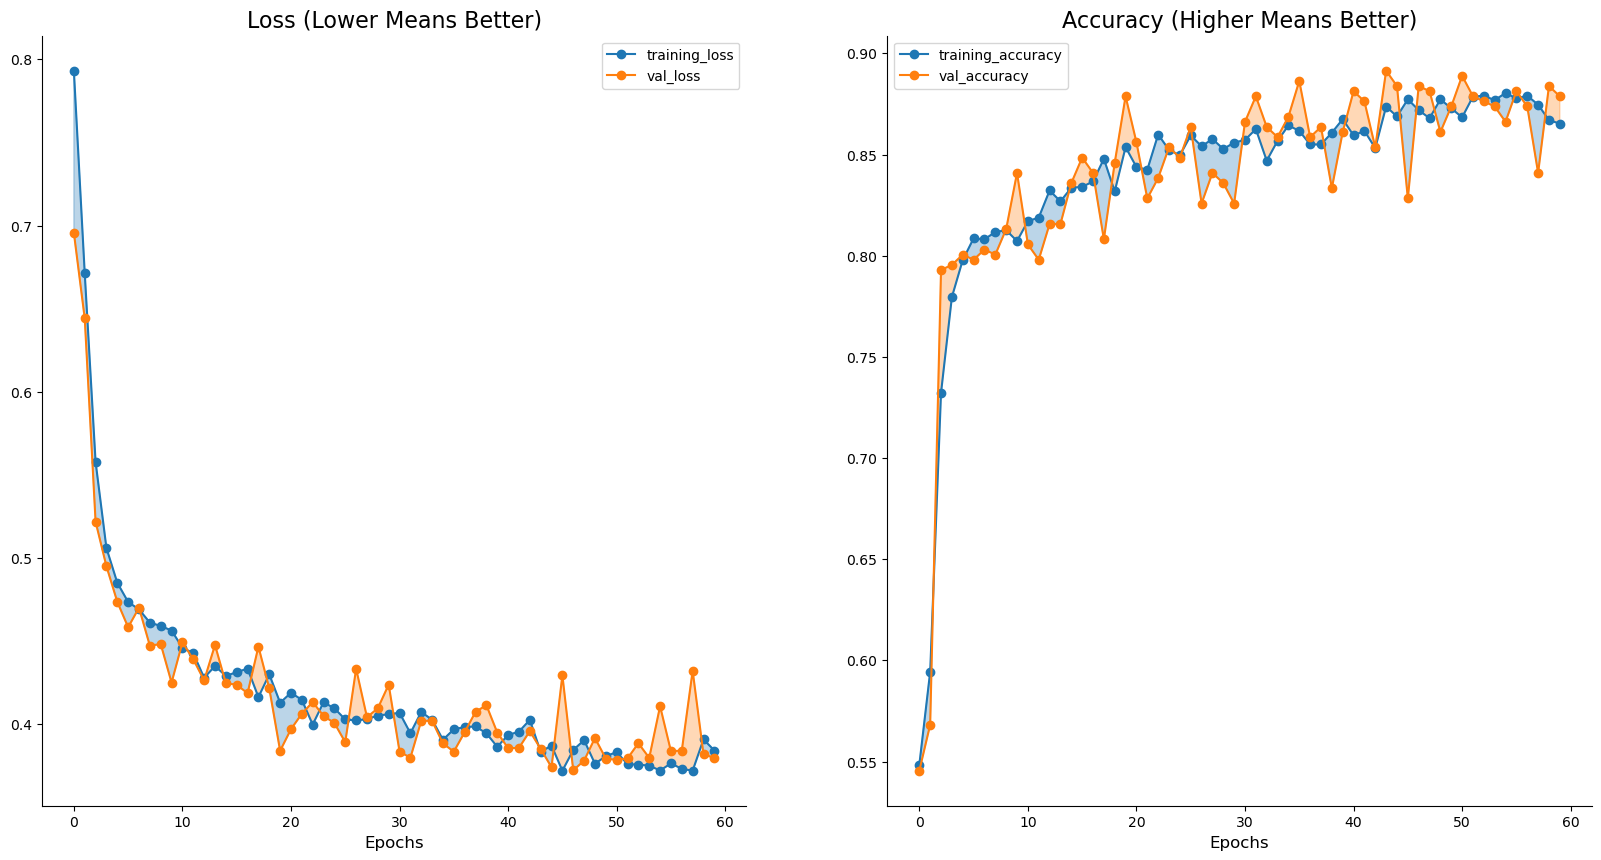

In [43]:
# plot cct model training history 
plot_training_curves(cct_model_history)

<div class="alert alert-block alert-info">
    <h3>Observe</h3>
    Here we see that our CCT Model loss initially converges at a stable rate, and becomes more unstable as the model trains after ~15 epochs. Some overfitting might have occured, which, if so, would explain this behaviour in the loss convergence. 
</div>

<a id='5.2'></a>
### Plot Confusion Matrix

In [35]:
def plot_confusion_matrix(y_true, y_pred, classes='auto', figsize=(10, 10), text_size=12): 
    # Generate confusion matrix 
    cm = confusion_matrix(y_true, y_pred)
    
    # Set plot size
    plt.figure(figsize=figsize)

    # Create confusion matrix heatmap
    disp = sns.heatmap(
        cm, annot=True, cmap='Greens',
        annot_kws={"size": text_size}, fmt='g',
        linewidths=0.1, linecolor='black', clip_on=False,
        xticklabels=classes, yticklabels=classes)
    
    # Set title and axis labels
    disp.set_title('Confusion Matrix', fontsize=24)
    disp.set_xlabel('Predicted Label', fontsize=20) 
    disp.set_ylabel('True Label', fontsize=20)
    plt.yticks(rotation=0) 

    # Plot confusion matrix
    plt.show()
    
    return

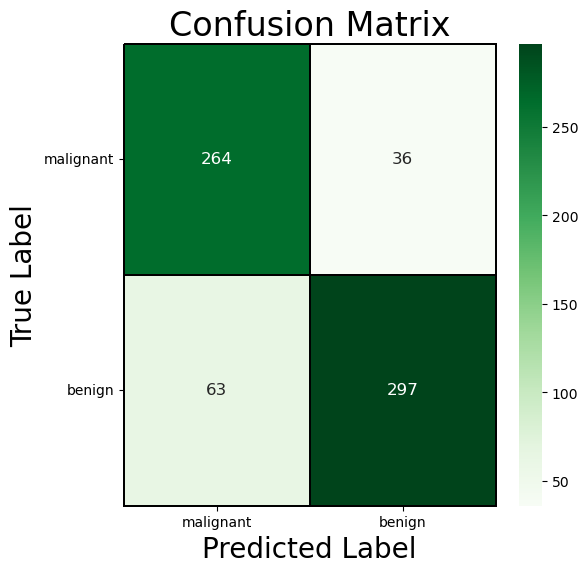

In [36]:
class_names = ['malignant', 'benign']

plot_confusion_matrix(
    test_df.label_encoded, 
    cct_test_predictions, 
    figsize=(6, 6), 
    classes=class_names)

<div class="alert alert-block alert-info">
    <h3>Observe</h3>
    We can see that the CCT Model is able to detect beningn cases much better in comparrison to malignant cases.
</div>

<a id='5.3'></a>
### Plot ROC Curves

<center>
    <figure>
        <img src="https://paulvanderlaken.files.wordpress.com/2019/08/roc.gif?w=800&h=400&crop=1" alt ="AUC" style='width:75%;'>
        <figcaption>
            Source: <a href="https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/">ROC, AUC, precision, and recall visually explained</a></figcaption>
    </figure>
</center>

An ROC (Receiver Operating Characteristic) curve is a measure that illustrates the diagnostic ability of a classifier system as its discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR) on the Y-axis against the false positive rate (FPR) on the X-axis at various classification thresholds. The area under the ROC curve (AUC) is calculated and used as a metric showing how well a model can classify data points.

**For more information see the following:**
> - [What is a ROC Curve, and How Do You Use It in Performance Modeling?](https://www.simplilearn.com/what-is-a-roc-curve-and-how-to-use-it-in-performance-modeling-article)
> - [Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
> - [Understanding AUC-ROC: Clearly explained](https://medium.datadriveninvestor.com/understanding-auc-roc-clearly-explained-74c53d292a02)
> - [ROC, AUC, precision, and recall visually explained](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)

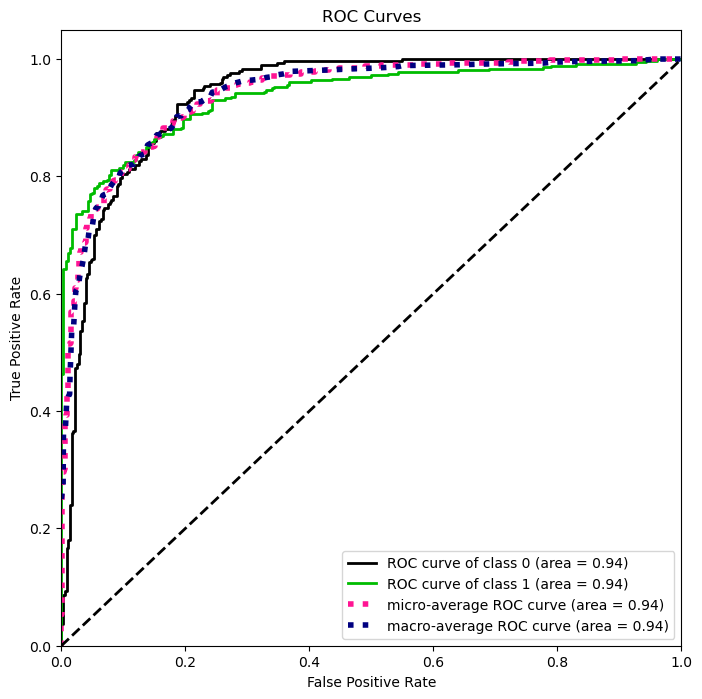

In [37]:
plot_roc(test_df.label_encoded, 
         cct_test_probabilities, 
         figsize=(8, 8), title_fontsize='large');

<div class="alert alert-block alert-info">
    <h3>Observe</h3>
    The CCT Model is able to achieve a decent ROC curve on both malignant and benign cases, which is an indication that the model is a strong classifier.
</div>

<a id='5.4'></a>
### View Classification Report

In [38]:
print(classification_report(test_df.label_encoded, 
                            cct_test_predictions, 
                            target_names=class_names))

              precision    recall  f1-score   support

   malignant       0.81      0.88      0.84       300
      benign       0.89      0.82      0.86       360

    accuracy                           0.85       660
   macro avg       0.85      0.85      0.85       660
weighted avg       0.85      0.85      0.85       660



<a id='5.5'></a>
### Record Classification Metrics

In [39]:
def generate_preformance_scores(y_true, y_pred, y_probabilities):
    
    model_accuracy = accuracy_score(y_true, y_pred)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, 
                                                                                 y_pred, 
                                                                                 average="weighted")
    model_matthews_corrcoef = matthews_corrcoef(y_true, y_pred)
    
    print('=============================================')
    print(f'\nPerformance Metrics:\n')
    print('=============================================')
    print(f'accuracy_score:\t\t{model_accuracy:.4f}\n')
    print('_____________________________________________')
    print(f'precision_score:\t{model_precision:.4f}\n')
    print('_____________________________________________')
    print(f'recall_score:\t\t{model_recall:.4f}\n')
    print('_____________________________________________')
    print(f'f1_score:\t\t{model_f1:.4f}\n')
    print('_____________________________________________')
    print(f'matthews_corrcoef:\t{model_matthews_corrcoef:.4f}\n')
    print('=============================================')
    
    preformance_scores = {
        'accuracy_score': model_accuracy,
        'precision_score': model_precision,
        'recall_score': model_recall,
        'f1_score': model_f1,
        'matthews_corrcoef': model_matthews_corrcoef
    }
    return preformance_scores


In [40]:
# Record CCT model performance scores
cct_performance = generate_preformance_scores(test_df.label_encoded, 
                                              cct_test_predictions, 
                                              cct_test_probabilities)


Performance Metrics:

accuracy_score:		0.8500

_____________________________________________
precision_score:	0.8535

_____________________________________________
recall_score:		0.8500

_____________________________________________
f1_score:		0.8503

_____________________________________________
matthews_corrcoef:	0.7021



<div class="alert alert-block alert-info">
    <h3>Observe</h3>
    Here we see that the CCT Model is able to achieve a good Matthew's Correlation Coefficient (MCC), which validates the strength of the model. An MCC closer to 1.0 in an indication that a models predictions are statistically of high quality and that the model is capable of predicting on unseen data.
</div>

<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#B6EADA;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>
           

<a id='conclusion'></a>

# <center>Conclusion</center>
<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/V6fJnWTt/Ali.png); background-size: 100% auto;"></div>

<br>

In this notebook we covered the implementation, training and performance analysis of a Compact Convolutional Transformer approach introduced in the paper "Escaping the Big Data Paradigm with Compact Transformers". We also briefly touched on other concepts such as Stochastic Depth and ROC Curves.

We found that not only did we manage to achieve substantially less total parameters in CCT in comaprison to other State-of-the-Art (SOTA) models such as the Vision Transformer and EfficientNet V2, we also managed to train the CCT model and achieved fantastic results on a single GPU without any transfer learning techniques.

As seen 

<h3>Suggestions for improving model performance</h3>

In order to improve the model's performance for skin classification, the following should be considered:
<ul>
<li><b>Increasing the input image size:</b> Due to being constrained with the ammount of memory available for this notebook, setting up a two gpu's or implementing a better data input pipeline may allow for larger image sizes to be used, which may allow for improved loss convergence and a higher MCC.</li>
<br>
<li><b>Hyperparameter Tuning:</b> By tuning the model's hyperameters with optimization frameworks such as <a href="https://optuna.org/">Optuna</a>, we can increase the model's performance by using the optimal hyperparameters to train the model.</li>
<br>    
<li><b>Increasing the depth of the model:</b> Increasing the depth of the model by adding more transformer blocks or more convolutional layers to the tokenizer may lead to improved performance.</li>
</ul>

<br>

<hr>

<div class="alert alert-block alert-success">  
    <center><h3>Thank you for taking the time to view my notebook, and I hope you found this interesting!</h3></center>
</div>